# Iris Dataset

Iris dataset is a typical machine learning classification problem. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [3]:
iris = pd.read_csv("/content/IRIS.csv")
iris.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Scatter Plot

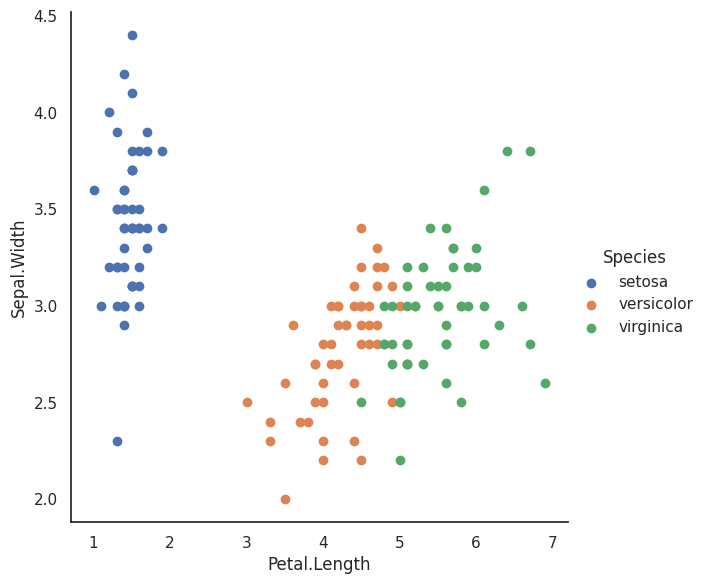

In [5]:
sns.FacetGrid(iris, hue="Species",height=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()

# Logistic Regression

#### Converting categorical varibales into numbers

In [6]:
flower_mapping = {'setosa': 0,'versicolor': 1,'virginica':2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [7]:
iris.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Preparing inputs and outputs

In [8]:
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values
y=iris[['Species']].values

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression()

In [11]:
model.fit(X, y)

LogisticRegression()

### Accuracy

In [12]:
model.score(X,y)

0.9733333333333334

#### Make Predictions

In [13]:
expected = y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### summarize the fit of the model

In [14]:
from sklearn import metrics

In [15]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [16]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


## Regularization

In [17]:
model = LogisticRegression(C=20,penalty='l2' )

In [18]:
model.fit(X,y)

LogisticRegression(C=20)

In [19]:
model.score(X,y)

0.98

# Effect of Regularization on classification boundary

In [20]:
from sklearn import linear_model, datasets
import numpy as np

In [21]:
def Regularization_Logistic(Regu,type):

    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:,:2]  # we only take the first two features.
    Y = iris.target

    h = .02  # step size in the mesh

    logreg = linear_model.LogisticRegression(C=Regu,penalty=type)

    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    expected = Y
    predicted = logreg.predict(X)
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))


In [22]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
i = interact(Regularization_Logistic, Regu=(1,10000),type=['l1','l2'])

interactive(children=(IntSlider(value=5000, description='Regu', max=10000, min=1), Dropdown(description='type'…